# Chapter 1

Joshua Burden  
DSC530 Week 3  
Bellevue University  
Catherine Williams  
06/19/2022

Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [2]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

## Examples from Chapter 1

Read NSFG data into a Pandas DataFrame.

In [3]:
import nsfg

In [5]:
preg = nsfg.ReadFemPreg()
preg.head()


,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


Print the column names.

In [6]:
preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

Select a single column name.

In [6]:
preg.columns[1]

Select a column and check what type it is.

In [7]:
pregordr = preg['pregordr']
type(pregordr)

Print a column.

In [8]:
pregordr

Select a single element from a column.

In [9]:
pregordr[0]

Select a slice from a column.

In [10]:
pregordr[2:5]

Select a column using dot notation.

In [11]:
pregordr = preg.pregordr

Count the number of times each value occurs.

In [12]:
preg.outcome.value_counts().sort_index()

Check the values of another variable.

In [13]:
preg.birthwgt_lb.value_counts().sort_index()

Make a dictionary that maps from each respondent's `caseid` to a list of indices into the pregnancy `DataFrame`.  Use it to select the pregnancy outcomes for a single respondent.

In [14]:
caseid = 10229
preg_map = nsfg.MakePregMap(preg)
indices = preg_map[caseid]
preg.outcome[indices].values

## Exercises

Select the `birthord` column, print the value counts, and compare to results published in the [codebook](ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Pregnancy.pdf)

In [8]:
preg.birthord.value_counts(sort=False)

1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: birthord, dtype: int64

We can also use `isnull` to count the number of nans.

In [9]:
preg.birthord.isnull().sum()

4445

Select the `prglngth` column, print the value counts, and compare to results published in the [codebook](ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Pregnancy.pdf)

In [10]:
preg.prglngth.value_counts()

39    4744
40    1120
38     609
9      594
41     591
6      543
37     457
13     446
4      412
8      409
35     357
36     329
42     328
17     253
11     202
30     198
5      181
7      175
12     170
3      151
43     148
22     147
10     137
32     122
26     117
2       78
34      60
33      50
44      46
16      44
15      39
28      38
21      37
19      34
24      31
31      29
14      29
29      23
20      18
18      17
0       15
25      15
23      12
45      10
1        9
27       8
48       7
50       2
47       1
46       1
Name: prglngth, dtype: int64

To compute the mean of a column, you can invoke the `mean` method on a Series.  For example, here is the mean birthweight in pounds:

In [11]:
preg.totalwgt_lb.mean()

7.265628457623368

Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [12]:
preg['totalwgt_kg'] = preg['totalwgt_lb'] / 2.20462

print(preg['totalwgt_kg'])

preg.totalwgt_kg.mean()

0        3.997288
1        3.572044
2        4.139035
3        3.175150
4        2.806606
           ...   
13588    2.806606
13589         NaN
13590         NaN
13591    3.401947
13592    3.401947
Name: totalwgt_kg, Length: 13593, dtype: float64


3.295637550971785

`nsfg.py` also provides `ReadFemResp`, which reads the female respondents file and returns a `DataFrame`:

In [17]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [18]:
resp = nsfg.ReadFemResp()

`DataFrame` provides a method `head` that displays the first five rows:

In [19]:
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


Select the `age_r` column from `resp` and print the value counts.  How old are the youngest and oldest respondents?

In [20]:
resp.age_r.value_counts(sort=False)

27    255
42    215
43    253
15    217
20    258
17    234
22    287
38    256
21    267
26    260
23    282
34    255
28    252
33    257
16    223
24    269
32    273
41    250
37    271
29    262
39    215
35    262
31    278
30    292
25    267
36    266
19    241
18    235
40    256
44    235
Name: age_r, dtype: int64

We can use the `caseid` to match up rows from `resp` and `preg`.  For example, we can select the row from `resp` for `caseid` 2298 like this:

In [21]:
resp[resp.caseid==2298]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667


And we can get the corresponding rows from `preg` like this:

In [22]:
preg[preg.caseid==2298]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
2610,2298,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.118451
2611,2298,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,5.5000,2.494761
2612,2298,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,4.1875,1.899420
2613,2298,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.118451


How old is the respondent with `caseid` 1?

In [25]:
print(resp.age_r == 1)

0       False
1       False
2       False
3       False
4       False
        ...  
7638    False
7639    False
7640    False
7641    False
7642    False
Name: age_r, Length: 7643, dtype: bool


What are the pregnancy lengths for the respondent with `caseid` 2298?

In [44]:
preg[preg.caseid==2298].prglngth

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

What was the birthweight of the first baby born to the respondent with `caseid` 5012?

In [45]:
preg[preg.caseid==5012].totalwgt_lb

5515    6.0
Name: totalwgt_lb, dtype: float64

# Exercise 2.1 Based on the results in this chapter, suppose you were asked to summarize what you learned about whether first babies arrive late.

### Which summary statistics would you use if you wanted to get a story on the evening news? Which ones would you use if you wanted to reassure an anxious patient?



Expectations of delivery gives a mean pregnancy length 38.6 weeks with a standard deviation of 2.7 weeks give the patient a time frame of when to expect their baby. Using the Cohen's d to show an anxious patient that there isn't much difference between a firstborn and other babies.

The news cycle would also need to focus on the tails of the distribution as the tails is substantually more extreme as it looks much more apart which is a meams of getting picked up by the news.



## Finally, imagine that you are Cecil Adams, author of The Straight Dope (http://straightdope.com), and your job is to answer the question, “Do first babies arrive late?” Write a paragraph that uses the results in this chapter to answer the question clearly, precisely, and honestly.


It is clear that there is a small effect size between first babies and other babies in regards to birth times. The effect is a difference of 0.2% or equal to .078 weeks or 13 hours. Pregnancies generally have an average time of 38.6 weeks, however the standard deviation of pregnancies is 2.7 weeks which is substantial when trying to determine when a baby could be born.




# Exercise 2.4
## Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups.

In [31]:


%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot
import math

In [8]:
df = nsfg.ReadFemPreg()
preg = df[df.outcome == 1]
preg.head()


,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [33]:
# filter dataframe for cols of interest (easier to work with)
preg_filtered = preg.filter(items = ["caseid", "outcome", "birthord",
                                     "prglngth", "totalwgt_lb"])
preg_filtered.head()

,caseid,outcome,birthord,prglngth,totalwgt_lb
0,1,1,1.0,39,8.8125
1,1,1,2.0,39,7.8750
2,2,1,1.0,39,9.1250
3,2,1,2.0,39,7.0000
4,2,1,3.0,39,6.1875


In [34]:
# split preg_filtered to get first babies
first = preg_filtered[preg_filtered.birthord == 1]
first.head()

,caseid,outcome,birthord,prglngth,totalwgt_lb
0,1,1,1.0,39,8.8125
2,2,1,1.0,39,9.1250
5,6,1,1.0,38,8.5625
8,7,1,1.0,39,7.5625
10,12,1,1.0,39,7.8125


In [35]:
other = preg_filtered[preg_filtered.birthord != 1]
other.head()

,caseid,outcome,birthord,prglngth,totalwgt_lb
1,1,1,2.0,39,7.8750
3,2,1,2.0,39,7.0000
4,2,1,3.0,39,6.1875
6,6,1,2.0,40,9.5625
7,6,1,3.0,42,8.3750


Text(0, 0.5, 'Frequency')

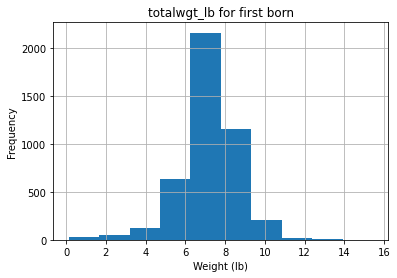

In [36]:
hist_plot = first["totalwgt_lb"].hist()
hist_plot.set_title("totalwgt_lb for first born")
hist_plot.set_xlabel("Weight (lb)")
hist_plot.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

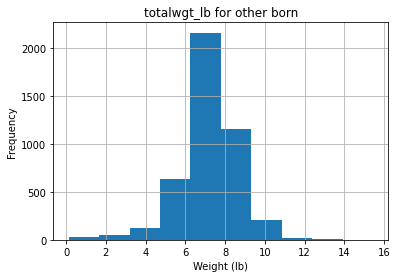

In [37]:
hist_plot = first["totalwgt_lb"].hist()
hist_plot.set_title("totalwgt_lb for other born")
hist_plot.set_xlabel("Weight (lb)")
hist_plot.set_ylabel("Frequency")

## Cohen's D 

formula for Cohen's D:

$$ 
d= (M_1 - M_2) / SD_(pooled)
$$



- Be careful with the order of the two lists
- Be mindful that Cohen's D works beset for a larger sample size (>50) as the smaller sample sizes tend to over-inflate results. A correction factor is available, which reduces effect sizes for small samples by a few percentage points.

$$
d = \frac{M_e - M_c}{Sample SD pooled} * (\frac {N-3}{N-2.25}) * \sqrt \frac{N-2}{N}
$$

To transform Cohen's D into Hedge's g, use the following:

$$
g = \frac{d}{\sqrt N / df}
$$


In [41]:
# function for cohens d
def CohenD(first, other, column):
    diff = first[column].mean() - other[column].mean()

    var1 = first[column].var()
    var2 = other[column].var()
    n1, n2 = len(first), len(other)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    difference = diff / math.sqrt(pooled_var)

    return round(difference, 4)

In [43]:
first.prglngth.mean(), other.prglngth.mean()

(38.60095173351461, 38.52291446673706)

In [42]:
cohen_d = CohenD(first, other, "totalwgt_lb")
cohen_d

-0.0887

In [40]:
cohen_d = CohenD(first, other, "prglngth")
cohen_d

0.0289

## How does it compare to the difference in pregnancy length?

The cohen's d value for totalwgt_lb produces a value of -0.0887. The value of prglngth gives a value of 0.0289. This suggests that pregnancy length does not have as much of an impact between first and other born babies. Totalwgt_lb and prglength however has a variablity of almost three times when compared.